In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.svm import SVC
import seaborn as sns



In [18]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('tabular-actgan-65415ed27fe248f10ea57922-data.csv')

In [4]:
data.head()

,age,gender,ethnicity,marital_status,education_level,employment_status,income,family_history,social_support,stress_level,...,depression_diagnosis,anxiety_diagnosis,suicidal_thoughts,therapy_attendance,medication_usage,self_esteem_level,loneliness_level,life_satisfaction,positive_emotions,negative_emotions
0,18,Male,Caucasian,Married,Doctorate,Employed,906799.7276,1,2,2,...,1,0,0,1,0,4,6,9,3,10
1,38,Non-binary,African American,Widowed,High School,Self-employed,628619.2488,0,4,10,...,0,1,0,1,0,4,1,1,2,10
2,77,Male,Hispanic,Divorced,College,Student,717644.4590,1,3,9,...,0,0,0,0,1,1,6,1,8,1
3,52,Male,Other,Divorced,College,Unemployed,268950.8484,1,5,1,...,0,0,0,0,0,1,6,4,1,10
4,74,Female,Caucasian,Single,College,Student,999360.1500,1,4,1,...,0,1,1,0,1,2,2,3,10,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   5000 non-null   int64  
 1   gender                5000 non-null   object 
 2   ethnicity             5000 non-null   object 
 3   marital_status        5000 non-null   object 
 4   education_level       5000 non-null   object 
 5   employment_status     5000 non-null   object 
 6   income                5000 non-null   float64
 7   family_history        5000 non-null   int64  
 8   social_support        5000 non-null   int64  
 9   stress_level          5000 non-null   int64  
 10  sleep_quality         5000 non-null   int64  
 11  exercise_frequency    5000 non-null   int64  
 12  alcohol_consumption   5000 non-null   int64  
 13  smoking_status        5000 non-null   object 
 14  drug_use              5000 non-null   int64  
 15  depression_diagnosis 

In [6]:
print(data.columns)

Index(['age', 'gender', 'ethnicity', 'marital_status', 'education_level',
       'employment_status', 'income', 'family_history', 'social_support',
       'stress_level', 'sleep_quality', 'exercise_frequency',
       'alcohol_consumption', 'smoking_status', 'drug_use',
       'depression_diagnosis', 'anxiety_diagnosis', 'suicidal_thoughts',
       'therapy_attendance', 'medication_usage', 'self_esteem_level',
       'loneliness_level', 'life_satisfaction', 'positive_emotions',
       'negative_emotions'],
      dtype='object')


In [7]:
X = data.drop('depression_diagnosis', axis=1)
y = data['depression_diagnosis']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
cat_col = [ 'gender', 'ethnicity', 'marital_status', 'education_level',
       'employment_status', 'smoking_status']

In [10]:
num_col = ['age', 'income', 'social_support',
       'stress_level', 'sleep_quality', 'exercise_frequency',
       'alcohol_consumption', 'self_esteem_level',
       'loneliness_level', 'life_satisfaction', 'positive_emotions',
       'negative_emotions']

In [11]:
bol_col = ['family_history' ,'drug_use',
       'depression_diagnosis', 'anxiety_diagnosis', 'suicidal_thoughts',
       'therapy_attendance', 'medication_usage']

In [12]:
# Apply Label Encoding to categorical columns
label_encoder_dict = {}
for col in cat_col:
    label_encoder = LabelEncoder()
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])
    label_encoder_dict[col] = label_encoder

In [13]:
# Standardize numerical features
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assume X_train is your feature matrix, and y_train is the target variable
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_train, y_train)

# Get the names of the top features
top_feature_indices = selector.get_support(indices=True)
top_feature_names = X_train.columns[top_feature_indices]

print("Top Feature Names:", top_feature_names)

Top Feature Names: Index(['age', 'social_support', 'sleep_quality', 'anxiety_diagnosis',
       'suicidal_thoughts', 'therapy_attendance', 'medication_usage',
       'self_esteem_level', 'loneliness_level', 'positive_emotions'],
      dtype='object')


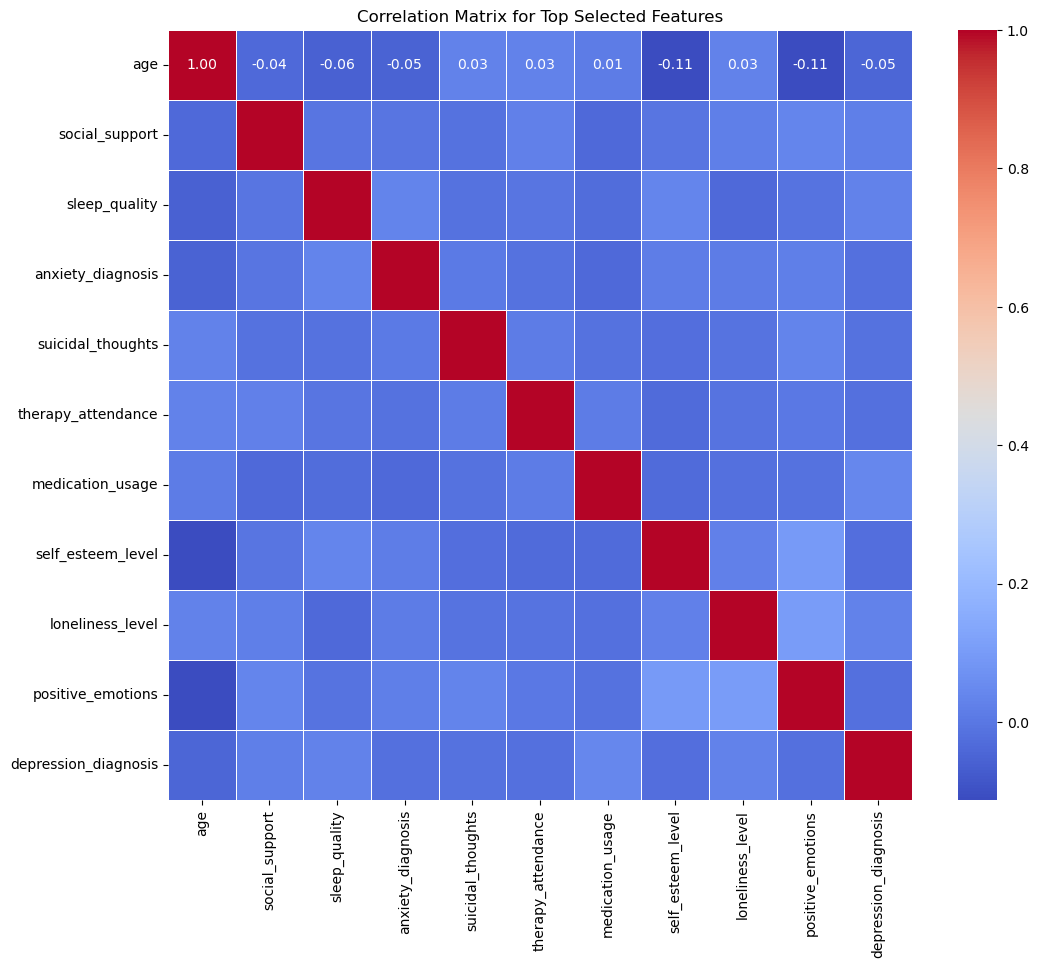

In [20]:
# Assuming X_train, top_feature_names, and y_train are already defined
# Extract the top features from X_train
X_top_features = X_train[top_feature_names]

# Concatenate the top features with the target variable (y_train)
data_for_corr = pd.concat([X_top_features, y_train], axis=1)

# Calculate the correlation matrix
corr_matrix = data_for_corr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title("Correlation Matrix for Top Selected Features")
plt.show()

In [21]:
top_feature_names = ['age', 'social_support', 'sleep_quality', 'anxiety_diagnosis',
       'suicidal_thoughts', 'therapy_attendance', 'medication_usage',
       'self_esteem_level', 'loneliness_level', 'positive_emotions']

In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
from keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(64, input_dim=X_train[top_feature_names].shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
from keras.layers import Dropout


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train[top_feature_names], y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test[top_feature_names], y_test)
print(f'Neural Network Accuracy: {accuracy:.4f}')

# Save the model
model.save("depression_diagnosis.h5")


Epoch 1/10


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5067 - loss: 0.7867 - val_accuracy: 0.5412 - val_loss: 0.6904
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5486 - loss: 0.6944 - val_accuracy: 0.5113 - val_loss: 0.6952
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5803 - loss: 0.6785 - val_accuracy: 0.5163 - val_loss: 0.6957
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5659 - loss: 0.6838 - val_accuracy: 0.5100 - val_loss: 0.7079
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5870 - loss: 0.6765 - val_accuracy: 0.5225 - val_loss: 0.7039
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5795 - loss: 0.6707 - val_accuracy: 0.5375 - val_loss: 0.7083
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6032 - loss: 0.6629 - val_accuracy: 0.5163 - val_loss: 0.7008
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5933 - loss: 0.6601 - val_accuracy: 0.5025 - val_

Neural Network Accuracy: 0.5210


In [24]:
# Save the model
model.save("suicidal_thoughts_model.h5")

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming model is your trained neural network model
y_pred = model.predict(X_test[top_feature_names])
y_pred_binary = (y_pred > 0.5).astype(int)  # Assuming it's a binary classification task

# Print classification report
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_binary))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       567
           1       0.44      0.37      0.40       433

    accuracy                           0.52      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.51      0.52      0.51      1000

Confusion Matrix:
[[362 205]
 [274 159]]
